2.4 Post Prediction analysis

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [21]:
train_merged_data = pd.read_csv("/content/train_df.csv", encoding_errors = "ignore")
test_merged_data = pd.read_csv("/content/test_df.csv", encoding_errors = "ignore")

In [22]:
train_merged_data

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,2014-02-14,418,5,0.829231,0.394004,5,0.176719,0,0,1060.0,...,0,2014,2,14,0,1,9.597271,0,1,0
1,2014-02-14,132,5,1.000000,0.000000,1,0.000000,3,2,1040.0,...,1,2014,2,14,0,1,9.825600,0,1,0
2,2014-02-14,133,5,1.000000,0.000000,1,0.000000,0,0,270.0,...,2,2014,2,14,0,1,7.601732,0,1,0
3,2014-02-14,134,5,1.000000,0.000000,1,0.000000,0,0,1200.0,...,3,2014,2,14,0,1,8.762208,0,1,0
4,2014-02-14,135,5,1.000000,0.000000,1,0.000000,3,0,5190.0,...,1,2014,2,14,0,1,10.292254,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560473,2015-07-31,746,5,1.000000,1.000000,0,1.000000,3,2,4330.0,...,2,2015,7,31,0,3,14.235110,0,0,1
560474,2015-07-31,747,5,1.000000,1.000000,0,1.000000,2,2,45740.0,...,3,2015,7,31,0,3,12.963680,0,0,1
560475,2015-07-31,748,5,1.000000,1.000000,0,1.000000,3,0,2380.0,...,1,2015,7,31,0,3,12.942907,0,0,1
560476,2015-07-31,742,5,1.000000,1.000000,0,1.000000,3,2,4380.0,...,3,2015,7,31,0,3,10.295276,0,0,1


In [23]:
test_merged_data

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,2015-08-01,1115,6,1.0,0,0,1,3,2,5350.0,...,2012.000000,2,2015,8,1,0,3,1,0,0
1,2015-08-01,378,6,1.0,0,0,0,0,2,2140.0,...,2011.820926,3,2015,8,1,0,3,1,0,0
2,2015-08-01,377,6,1.0,0,0,0,0,2,100.0,...,2010.000000,0,2015,8,1,0,3,1,0,0
3,2015-08-01,373,6,1.0,0,0,0,3,2,11120.0,...,2012.000000,1,2015,8,1,0,3,1,0,0
4,2015-08-01,372,6,1.0,0,0,0,3,2,4880.0,...,2014.000000,1,2015,8,1,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,2015-09-17,732,4,1.0,1,0,0,0,2,35280.0,...,2011.820926,3,2015,9,17,1,3,0,1,0
41084,2015-09-17,731,4,1.0,1,0,0,0,0,15270.0,...,2014.000000,1,2015,9,17,1,3,0,1,0
41085,2015-09-17,729,4,1.0,1,0,0,2,2,8980.0,...,2011.820926,3,2015,9,17,1,3,0,1,0
41086,2015-09-17,727,4,1.0,1,0,0,0,0,2050.0,...,2011.820926,3,2015,9,17,1,3,0,1,0


In [24]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560478 entries, 0 to 560477
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       560478 non-null  object 
 1   Store                      560478 non-null  int64  
 2   DayOfWeek                  560478 non-null  int64  
 3   Open                       560478 non-null  float64
 4   Promo                      560478 non-null  float64
 5   StateHoliday               560478 non-null  int64  
 6   SchoolHoliday              560478 non-null  float64
 7   StoreType                  560478 non-null  int64  
 8   Assortment                 560478 non-null  int64  
 9   CompetitionDistance        560478 non-null  float64
 10  CompetitionOpenSinceMonth  560478 non-null  float64
 11  CompetitionOpenSinceYear   560478 non-null  float64
 12  Promo2                     560478 non-null  int64  
 13  Promo2SinceWeek            56

In [25]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       41088 non-null  object 
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  int64  
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  int64  
 8   Assortment                 41088 non-null  int64  
 9   CompetitionDistance        41088 non-null  float64
 10  CompetitionOpenSinceMonth  41088 non-null  float64
 11  CompetitionOpenSinceYear   41088 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            41088 non-null  flo

In [26]:
train_merged_data.set_index('Date', inplace=True)
train_merged_data.sort_index(inplace=True)

In [27]:
X = train_merged_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']]
y = train_merged_data['SalesPerCustomer']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-12,951,5,1.0,0.0,0,0.0,3,2,710.0,7.221419,...,2011.000000,1,2015,6,12,0,2,0,1,0
2014-05-02,736,5,1.0,1.0,0,0.0,2,2,1650.0,7.221419,...,2011.000000,1,2014,5,2,0,2,0,0,0
2015-07-11,604,6,1.0,0.0,0,0.0,3,0,10950.0,3.000000,...,2011.743642,3,2015,7,11,0,3,0,1,0
2015-03-02,914,1,1.0,1.0,0,0.0,2,2,2640.0,4.000000,...,2012.000000,2,2015,3,2,1,1,0,0,0
2015-03-29,370,7,0.0,0.0,0,0.0,3,0,8250.0,10.000000,...,2009.000000,1,2015,3,29,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-24,918,6,1.0,0.0,0,0.0,0,2,18710.0,4.000000,...,2011.743642,3,2014,5,24,0,2,0,0,0
2014-10-23,869,4,1.0,1.0,0,1.0,2,0,230.0,10.000000,...,2011.000000,1,2014,10,23,1,4,0,0,0
2015-02-07,253,6,1.0,0.0,0,0.0,0,2,250.0,7.221419,...,2013.000000,0,2015,2,7,0,1,0,0,0


In [30]:
X_test

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-20,42,4,1.0,0.0,0,0.0,0,2,290.0,7.221419,...,2011.000000,1,2014,11,20,1,4,0,1,0
2015-06-09,964,2,1.0,0.0,0,0.0,0,0,270.0,7.221419,...,2013.000000,0,2015,6,9,1,2,0,0,0
2014-10-09,1028,4,1.0,1.0,0,1.0,0,0,150.0,7.221419,...,2013.000000,1,2014,10,9,1,4,0,0,0
2015-05-07,82,4,1.0,1.0,0,0.0,0,0,22390.0,4.000000,...,2009.000000,1,2015,5,7,1,2,0,0,0
2015-04-02,240,4,1.0,1.0,0,1.0,0,0,1110.0,5.000000,...,2011.743642,3,2015,4,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-12,606,4,1.0,0.0,0,0.0,0,0,2260.0,11.000000,...,2011.743642,3,2015,3,12,1,1,0,1,0
2015-06-11,146,4,1.0,0.0,0,0.0,3,2,8050.0,10.000000,...,2012.000000,1,2015,6,11,1,2,0,1,0
2015-02-10,349,2,1.0,0.0,0,0.0,2,2,1490.0,4.000000,...,2011.743642,3,2015,2,10,1,1,0,1,0


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
imputer = SimpleImputer(strategy='mean')
regressor = LinearRegression()


In [38]:
pipeline = Pipeline([
    ('imputer', StandardScaler()),  # Feature scaling (optional)
    ('refressor', regressor)])

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', StandardScaler()),
                ('refressor', LinearRegression())])

In [40]:
y_pred = pipeline.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.7034083560851894


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np


X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)  # Output layer for regression
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/5
14012/14012 [==============================] - 232s 16ms/step - loss: 101368.3750 - val_loss: 105.0014
Epoch 2/5
14012/14012 [==============================] - 225s 16ms/step - loss: 91.9913 - val_loss: 4.9242
Epoch 3/5
14012/14012 [==============================] - 225s 16ms/step - loss: 145.9606 - val_loss: 5.7743
Epoch 4/5
14012/14012 [==============================] - 223s 16ms/step - loss: 342.6645 - val_loss: 7.0749
Epoch 5/5
14012/14012 [==============================] - 222s 16ms/step - loss: 5.2518 - val_loss: 33.8346


In [43]:
from sklearn.metrics import mean_squared_error

# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (LSTM):", mse_lstm)

3503/3503 [==============================] - 19s 5ms/step
Mean Squared Error (LSTM): 33.8346127780745


## **2.4 Post Prediction analysis**
Explore the feature importance from our modelling. Creatively deduce a way to estimate
the confidence interval of your predictions. Extra marks will be given for this.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


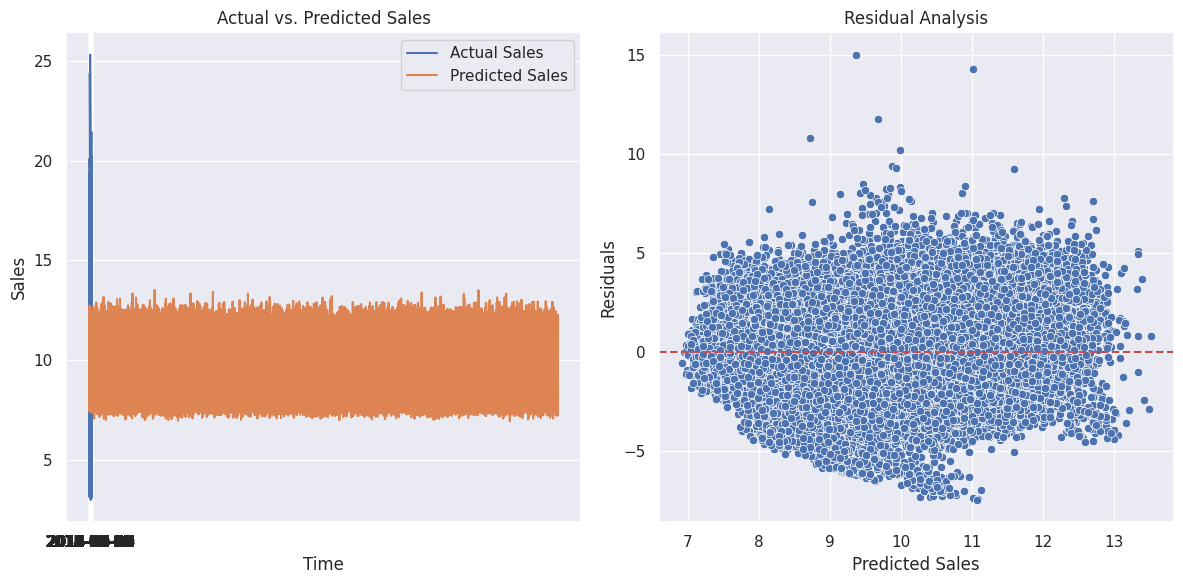

MAE for Store Type '0': 1.2874098159015392
MAE for Store Type '1': 1.2874098159015392
MAE for Store Type '2': 1.2874098159015392
MAE for Store Type '3': 1.2874098159015392


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Visualize predictions and residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Analysis")

plt.tight_layout()
plt.show()
from sklearn.metrics import mean_absolute_error

# Segment analysis (example)
store_type_segments = train_merged_data.groupby('StoreType')
for store_type, group in store_type_segments:
    segment_mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for Store Type '{store_type}': {segment_mae}")

In [46]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

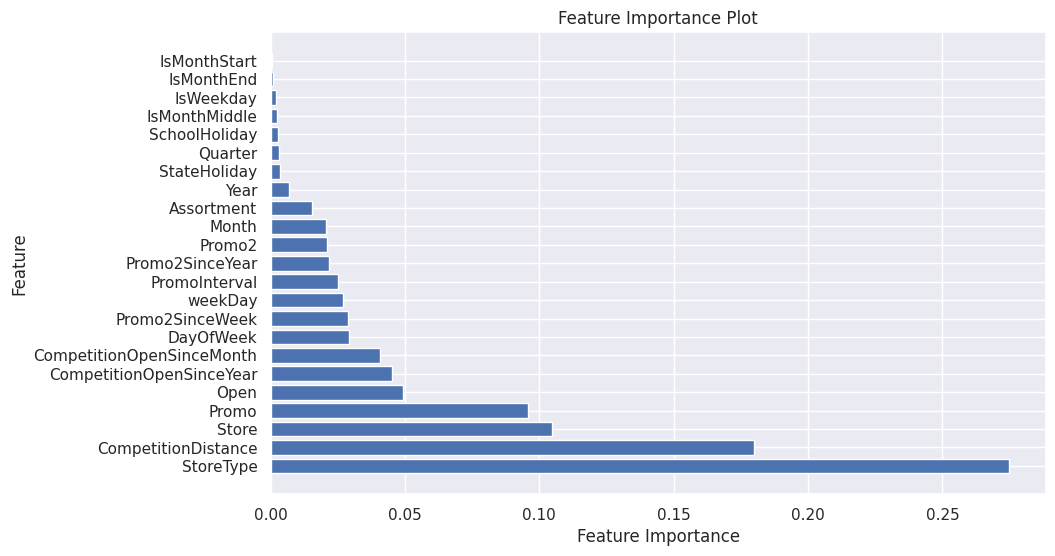

In [47]:
# Define features and target
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']
target = 'SalesPerCustomer'

# Assuming train_data_merged contains your preprocessed data
train_features = train_merged_data[features]
train_labels = train_merged_data[target]

model = RandomForestRegressor()
model.fit(train_features, train_labels)
# Retrieve feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [48]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
predictions = model.predict(X_train)

In [ ]:
import numpy as np

# Assuming you have 'predictions' as your model's predictions
n_bootstraps = 1000  # Number of bootstrap samples
bootstrap_predictions = np.zeros((len(predictions), n_bootstraps))

for i in range(n_bootstraps):
    # Randomly sample data with replacement
    bootstrap_indices = np.random.choice(len(predictions), size=len(predictions), replace=True)
    bootstrap_sample = predictions[bootstrap_indices]

    # Store the sample in the bootstrap_predictions array
    bootstrap_predictions[:, i] = bootstrap_sample

# Calculate percentiles for prediction intervals
lower_percentile = np.percentile(bootstrap_predictions, 2.5, axis=1)
upper_percentile = np.percentile(bootstrap_predictions, 97.5, axis=1)